In [2]:
import os
print(os.getcwd())


C:\Users\Rijesh


In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot


In [4]:
# Path file to python 3.11 (3.11 
import sys
print(sys.executable)


C:\Users\Rijesh\AppData\Local\Programs\Python\Python311\python.exe


In [5]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm

# TensorFlow Libraries
from tensorflow import keras
from tensorflow.keras import layers, models
from keras_preprocessing.image import ImageDataGenerator  # keras-preprocessing is installed
from tensorflow.keras.layers import Dense, Dropout  # Using tensorflow.keras directly
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# Replace MobileNetV2 with ResNet
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Model
from tensorflow.keras.layers import Normalization, Rescaling, Resizing  # ✅ Updated import

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [6]:
import urllib.request

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
urllib.request.urlretrieve(url, "helper_functions.py")


('helper_functions.py', <http.client.HTTPMessage at 0x274a44d8dd0>)

In [7]:
import requests

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
response = requests.get(url)

# Save the file in the current working directory
with open("helper_functions.py", "wb") as file:
    file.write(response.content)

print("Download complete!")


Download complete!


In [8]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)  # ResNet prefers 224x224 input size

In [9]:
from pathlib import Path

dataset = Path(r"C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized")  # Use raw string (r"") or Path to avoid issues
walk_through_dir(str(dataset))  # Convert Path to string if needed


There are 2 directories and 0 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized'.
There are 6 directories and 0 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test'.
There are 0 directories and 14 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\Blast'.
There are 0 directories and 44 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\BLB'.
There are 0 directories and 19 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\healthy'.
There are 0 directories and 24 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\hispa'.
There are 0 directories and 7 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\leaf folder'.
There are 0 directories and 16 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\leaf spot'.
There are 6 directories and 0 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Train'.
There are 0 directories an

In [10]:
from pathlib import Path
import pandas as pd

# Define dataset path
dataset_path = Path(r"C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized")

# Get file paths for images (supports multiple formats)
filepaths = list(dataset_path.glob("**/*.[JjPp][PpNn][Gg]"))  # Matches .jpg, .jpeg, .png

# Extract labels from folder names (parent folder of each image)
labels = [fp.parent.name for fp in filepaths]

# Create a DataFrame
image_df = pd.DataFrame({"Filepath": filepaths, "Label": labels})

# Convert filepaths to string for compatibility
image_df["Filepath"] = image_df["Filepath"].astype(str)

# Display dataset summary
print(image_df.head())
print(f"Total images: {len(image_df)}")
print(image_df['Label'].value_counts())  # Show class distribution


                                            Filepath  Label
0  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  Blast
1  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  Blast
2  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  Blast
3  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  Blast
4  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  Blast
Total images: 643
Label
BLB            220
hispa          142
healthy        100
leaf spot       80
Blast           67
leaf folder     34
Name: count, dtype: int64


In [11]:
print(image_df.sample(10))  # Show 10 random samples
print(image_df['Label'].value_counts())  # Count images per category


                                              Filepath      Label
228  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...        BLB
130  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      Blast
266  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...        BLB
507  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      hispa
382  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...    healthy
119  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot
622  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot
524  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      hispa
345  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...        BLB
494  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      hispa
Label
BLB            220
hispa          142
healthy        100
leaf spot       80
Blast           67
leaf folder     34
Name: count, dtype: int64


# Placing The datas into the dataframe

In [12]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(r"C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [13]:
image_df

Filepath      Label
0    C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      Blast
1    C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      Blast
2    C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      Blast
3    C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      Blast
4    C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      Blast
..                                                 ...        ...
638  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot
639  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot
640  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot
641  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot
642  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot

[643 rows x 2 columns]

# Visualizing the Dataset - For verification

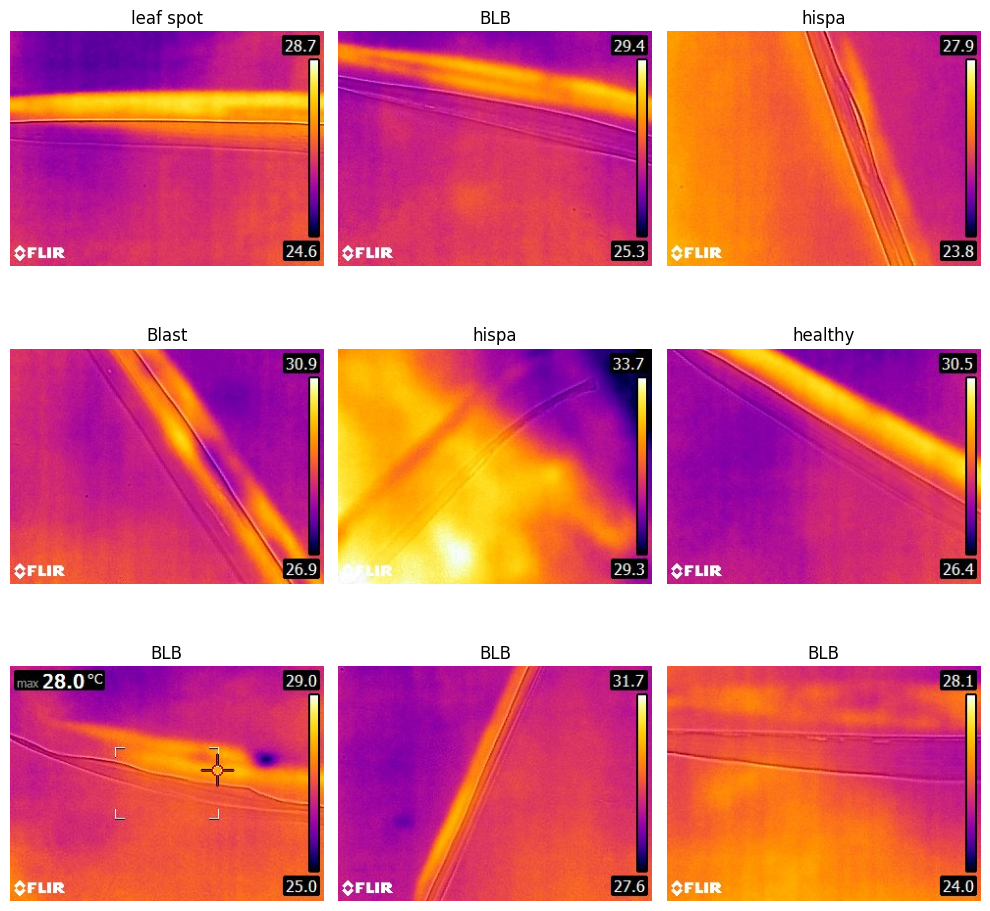

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image

# Select a subset of images
sample_images = image_df.sample(9).reset_index(drop=True)  # Select 9 random images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # 3x3 grid

# Plot images
for i, ax in enumerate(axes.flat):
    img_path = sample_images.iloc[i]['Filepath']  # Get correct file path
    img = Image.open(img_path)  # Open image
    ax.imshow(img)
    ax.set_title(sample_images.iloc[i]['Label'])  # Set title as category label
    ax.axis("off")

plt.tight_layout()
plt.show()


In [15]:
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [16]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input
)

In [17]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 412 validated image filenames belonging to 6 classes.
Found 102 validated image filenames belonging to 6 classes.
Found 129 validated image filenames belonging to 6 classes.


# Attention to number of classes and no of denses

In [18]:
from tensorflow.keras import layers

# Resize and rescale layer (fixed version)
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(224, 224),  # No more 'experimental'
    layers.Rescaling(1./255),
])


# Training the model - Resnet50
The model images will be subjected to a pre-trained CNN model called MobileNetV2. Three callbacks will be utilized to monitor the training. These are: Model Checkpoint, Early Stopping, Tensorboard callback. The summary of the model hyperparameter is shown as follows:

In [19]:
# Load the pretrained ResNet model
pretrained_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False  # Freeze the model weights


In [20]:
print(pretrained_model.summary())  # Prints model architecture


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [21]:
# Create checkpoint callback
checkpoint_path = r"C:\Vs Code\SDG\thermal_images_classification_model_checkpoint.weights.h5"

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,  # Save model weights to this path
    save_weights_only=True,  # Saves only model weights (not the entire model)
    monitor="val_accuracy",  # Track validation accuracy to save the best model
    save_best_only=True,  # Save only when performance improves
    verbose=1  # Print messages when saving
)


In [22]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 6,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

# Attention below: Original Dense was 5 We have 6 classes

It started 15:49. Ended at 15:53

In [23]:
from tensorflow.keras.optimizers import Adam

# Load the pretrained ResNet50 model
pretrained_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False  # Freeze the pretrained model

# Define model architecture
inputs = pretrained_model.input
x = resize_and_rescale(inputs)

x = Dense(256, activation='relu')(pretrained_model.output)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(6, activation='softmax')(x)  # Adjusted for 6 classes

model = Model(inputs=inputs, outputs=outputs)

# Compile the model with RMSprop optimizer and learning rate 0.001
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=20,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", "thermal_images_classification"),
        checkpoint_callback,
    ]
)


Saving TensorBoard log files to: training_logs/thermal_images_classification/20250408-225620


C:\Users\Rijesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3846 - loss: 1.6039   
Epoch 1: val_accuracy improved from -inf to 0.76471, saving model to C:\Vs Code\SDG\thermal_images_classification_model_checkpoint.weights.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 122s 8s/step - accuracy: 0.3899 - loss: 1.5948 - val_accuracy: 0.7647 - val_loss: 0.9176
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5389 - loss: 1.0959  
Epoch 2: val_accuracy did not improve from 0.76471
13/13 ━━━━━━━━━━━━━━━━━━━━ 92s 7s/step - accuracy: 0.5427 - loss: 1.0894 - val_accuracy: 0.7451 - val_loss: 0.7028
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7432 - loss: 0.6825  
Epoch 3: val_accuracy improved from 0.76471 to 0.79412, saving model to C:\Vs Code\SDG\thermal_images_classification_model_checkpoint.weights.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 94s 7s/step - accuracy: 0.7442 - loss: 0.6825 - val_accuracy: 0.7941 - val_loss: 0.5933
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy:

In [24]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.44977
Test Accuracy: 85.27%


# Visualizing loss curves  

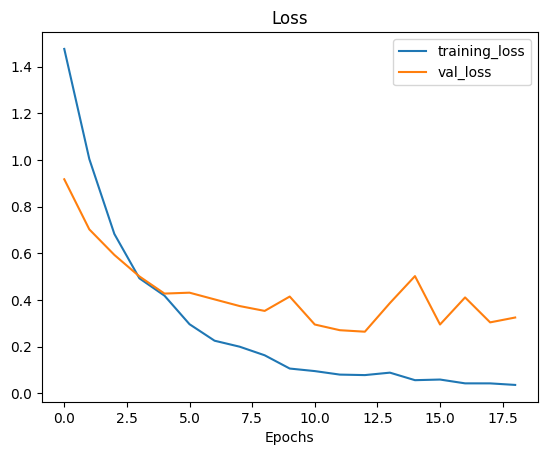

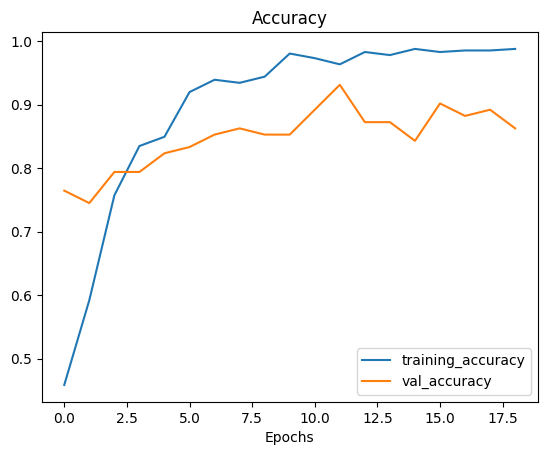

In [25]:
plot_loss_curves(history)

# Make Predictions 

In [26]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step 
The first 5 predictions: ['leaf spot', 'BLB', 'hispa', 'BLB', 'healthy']


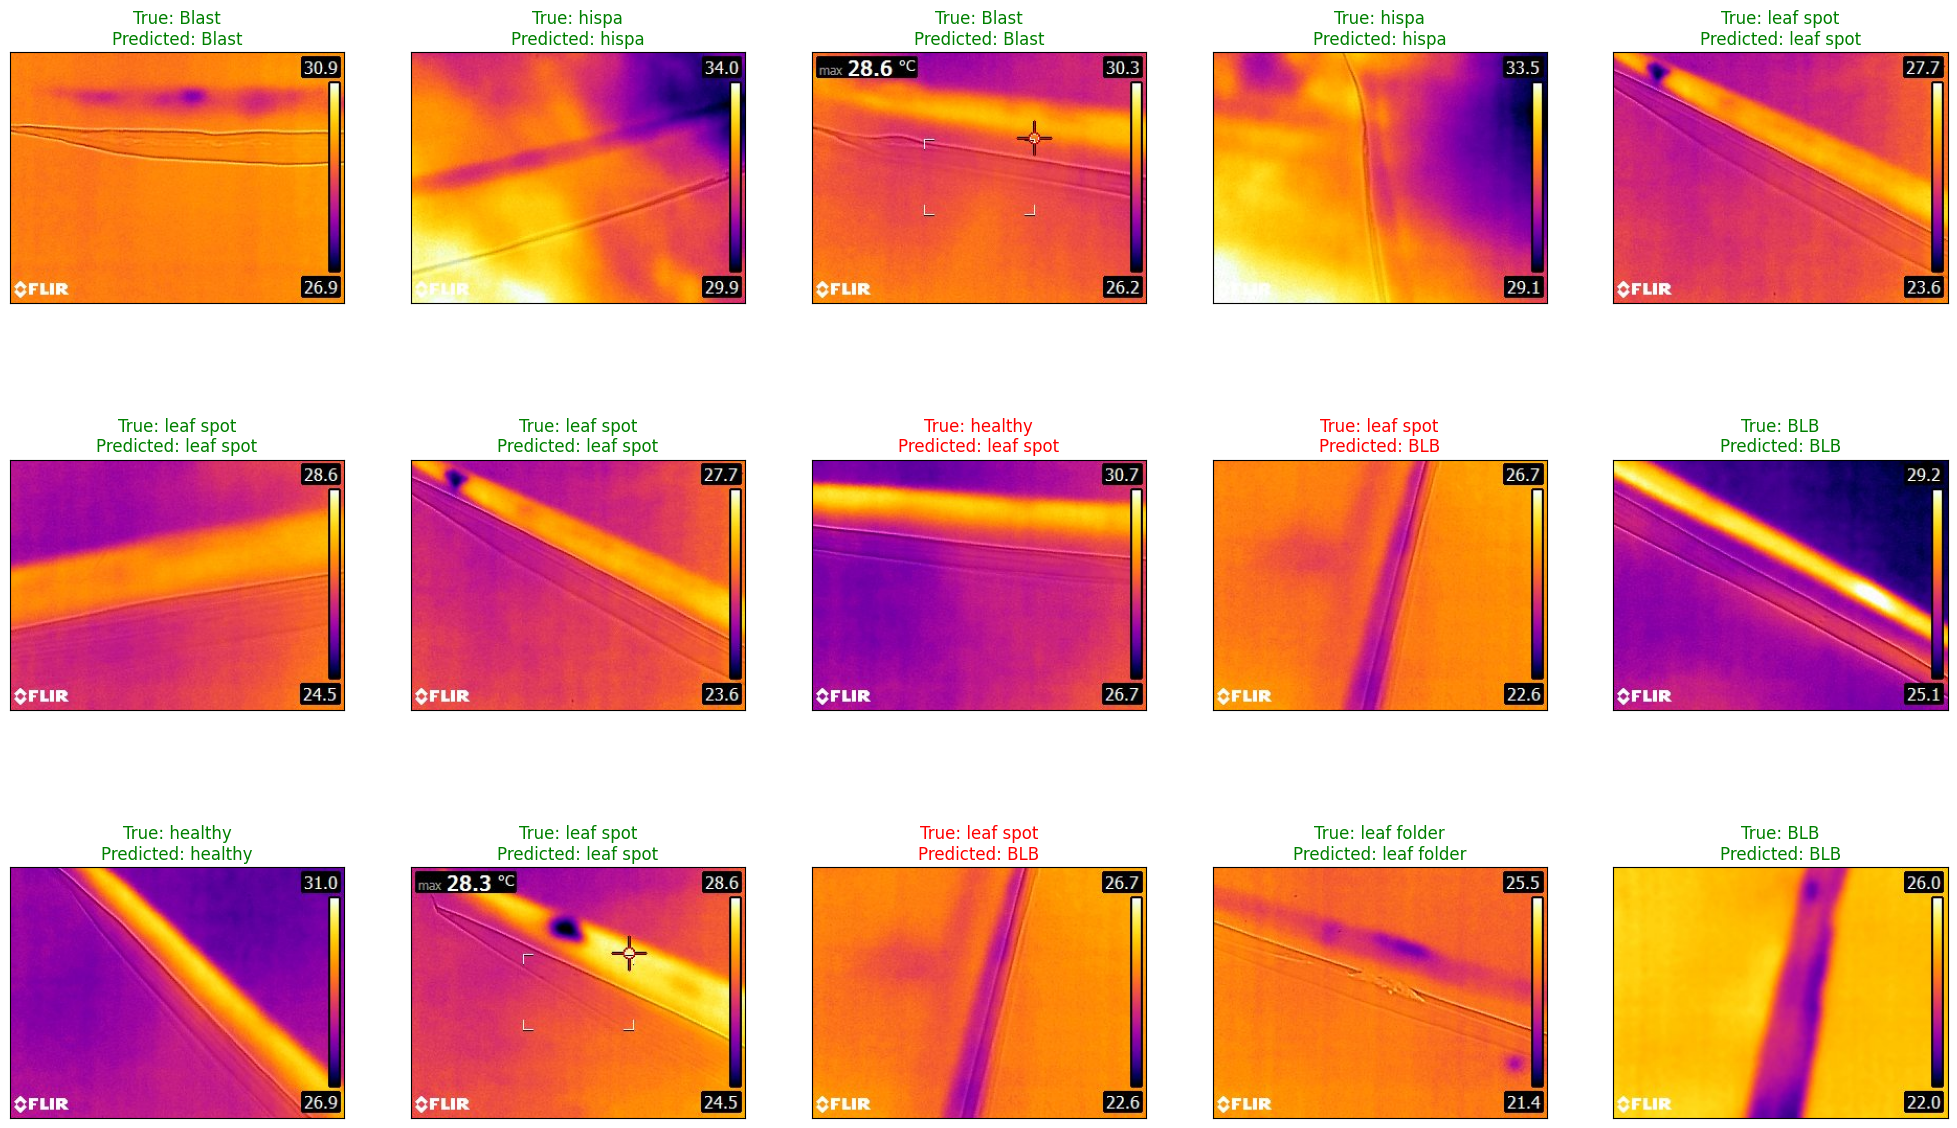

<Figure size 640x480 with 0 Axes>

In [27]:
# Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

# Plotting the Classification Reports and Confusion Matrix

In [28]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         BLB       0.82      0.98      0.89        43
       Blast       0.78      0.44      0.56        16
     healthy       0.88      0.83      0.86        18
       hispa       0.86      0.86      0.86        21
 leaf folder       1.00      1.00      1.00         7
   leaf spot       0.88      0.88      0.88        24

    accuracy                           0.85       129
   macro avg       0.87      0.83      0.84       129
weighted avg       0.85      0.85      0.84       129



In [29]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score     support
BLB            0.823529  0.976744  0.893617   43.000000
Blast          0.777778  0.437500  0.560000   16.000000
healthy        0.882353  0.833333  0.857143   18.000000
hispa          0.857143  0.857143  0.857143   21.000000
leaf folder    1.000000  1.000000  1.000000    7.000000
leaf spot      0.875000  0.875000  0.875000   24.000000
accuracy       0.852713  0.852713  0.852713    0.852713
macro avg      0.869300  0.829953  0.840484  129.000000
weighted avg   0.850687  0.852713  0.843520  129.000000

In [30]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 7), text_size=10, norm=False, savefig=False): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """  
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
    plt.xticks(rotation=90, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")

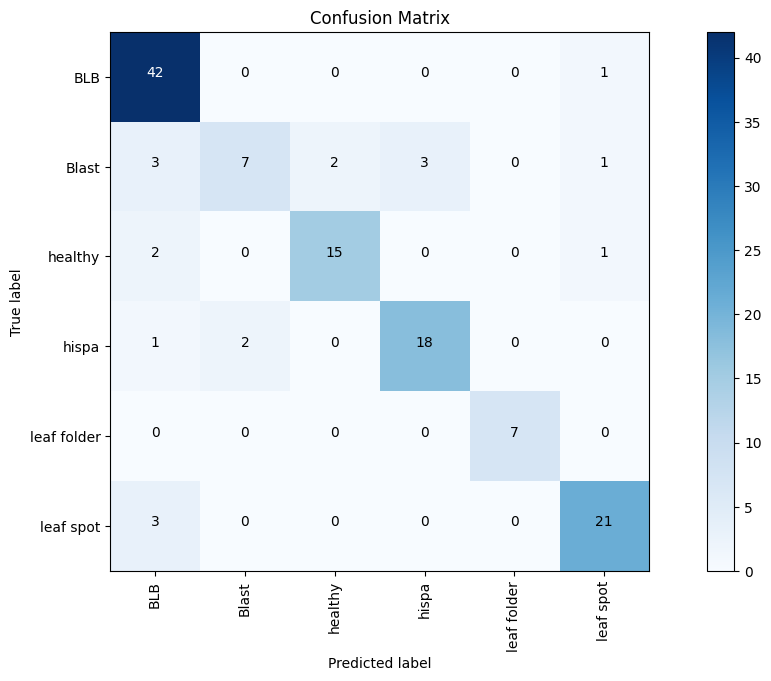

In [31]:
make_confusion_matrix(y_test, pred, list(labels.values()))